## **统计检验方法**

|| 二分类 | 连续 |
|--- | :---: | :---: |
| **单变量** |二分类: $\chi^2$检验<br>多分类: $\chi^2$检验<br>连续: 双样本t检验|二分类: 双样本t检验<br>多分类: 单因素方差分析(ANOVA)<br>连续: 相关分析|
| **多变量** |分类: 逻辑回归<br>连续: 逻辑回归|分类: 多因素方差分析 & 线性回归<br>连续: 线性回归|

### **一、双变量检验**

---

### **1.1 两个连续变量**

**Pearson相关检验**: 判断两组样本背后的总体分布是否存在显著的线性相关(ref: 卫生统计学, P 224 ~ 225)

,x,y
x,1.0000000,0.9974101
y,0.9974101,1.0000000



	Pearson's product-moment correlation

data:  x and y
t = 24.019, df = 3, p-value = 0.0001582
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9593822 0.9998378
sample estimates:
      cor 
0.9974101 


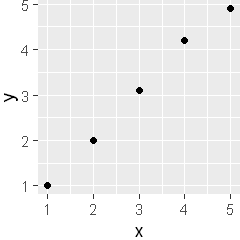

In [30]:
library(ggplot2)
library(repr)

x <- c(1.0, 2.0, 3.0, 4.0, 5.0)
y <- c(1.0, 2.0, 3.1, 4.2, 4.9)
dat <- data.frame(x, y)

options(repr.plot.width=2, repr.plot.height=2)
ggplot(dat, aes(x = x, y = y)) + 
    geom_point() + 
    theme(plot.title = element_text(hjust = 0.5,size=2), plot.margin = unit(c(0, 0, 0, 0), "cm"))

cor(dat, method = "pearson")
cor.test(x, y, alternative = "two.side", method = "pearson")

**秩相关系数检验**

In [31]:
cor(dat, method = "spearman")
cor.test(x, y, alternative = "two.side", method = "spearman")

,x,y
x,1,1
y,1,1



	Spearman's rank correlation rho

data:  x and y
S = 4.4409e-15, p-value = 0.01667
alternative hypothesis: true rho is not equal to 0
sample estimates:
rho 
  1 


**直线回归统计推断**

In [34]:
relation <- lm(y ~ x)

summary(relation)


Call:
lm(formula = y ~ x)

Residuals:
    1     2     3     4     5 
-0.04 -0.04  0.06  0.16 -0.14 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04000    0.13808    0.29 0.790926    
x            1.00000    0.04163   24.02 0.000158 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1317 on 3 degrees of freedom
Multiple R-squared:  0.9948,	Adjusted R-squared:  0.9931 
F-statistic: 576.9 on 1 and 3 DF,  p-value: 0.0001582


检验残差是否符合正态分布($H_0$: 符合正态分布):

In [35]:
shapiro.test(resid(relation))


	Shapiro-Wilk normality test

data:  resid(relation)
W = 0.96086, p-value = 0.814


看见P值大于0.005, 因此接受$H_0$, 即残差符合正态分布.